# Programowanie sieciowe

In [110]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1
## Sciezka krytyczna

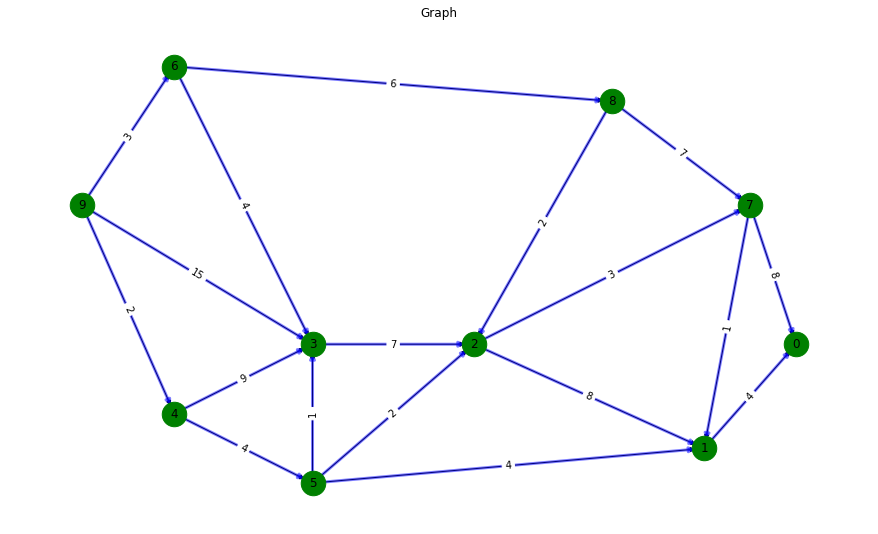

In [111]:

weights = [
    (1, 0, 4),
    (7, 0, 8),
    (7, 1, 1),
    (2, 1, 8),
    (2, 7, 3),
    (8, 2, 2),
    (5, 2, 2),
    (3, 2, 7),
    (4, 3, 9),
    (5, 1, 4),
    (5, 3, 1),
    (4, 5, 4),
    (6, 8, 6),
    (6, 3, 4),
    (8, 7, 7),
    (9, 6, 3),
    (9, 4, 2),
    (9, 3, 15)
]

G = nx.DiGraph()

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(12, 7))

pos = {
    0: (17, 3.5),
    1: (15, 2),
    2: (10, 3.5),
    3: (6.5, 3.5),
    4: (3.5, 2.5),
    5: (6.5, 1.5),
    6: (3.5, 7.5),
    7: (16, 5.5),
    8: (13, 7),
    9: (1.5, 5.5)
}

nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(G, pos, width=3,alpha=0.5,edge_color='b')
nx.draw_networkx_nodes(G, pos,node_size=600, node_color="g")
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title("Graph")
plt.show()
# print(nx.get_edge_attributes(G,'weight'))

**9** - wierzcholek do ktorego nie wchodzi zaden inny <br>
**0** - wierzcholek z ktorego nie wychodzi zaden inny

In [112]:
M = nx.to_numpy_array(G, nodelist=range(10))

def changeIndexing(M):
    M_copy = M.copy()
    M_copy[M_copy > 0] = 1 # Tworze macierz binarna
    columns = [i for i in range(len(M))] # Miejsce zapisu
    path = []

    while len(M) > 1:
        n = len(M)

        for i in range(n):
            if False not in list(M[:,i] == 0):
                mask = [k for k in range(n) if k != i]
                M = M[np.ix_(mask, mask)]
                path.append(columns.pop(i))
                break
    
    path.append(0)
    changedIndexes = [0 for _ in range(len(path))]

    for i, el in enumerate(path):
        changedIndexes[el] = i
    return changedIndexes

In [113]:
class Queue:
    def __init__(self):
        self.queue = []

    def enqueue(self, val):
        self.queue.append(val)
    
    def dequeue(self):
        return self.queue.pop(0)
    
    def is_empty(self):
        return len(self.queue) == 0

In [114]:
def findCritical(M):
    n = len(M)
    newIndexes = changeIndexing(M)

    start = newIndexes[0]
    
    terminy = [[0, np.inf] for _ in range(n)]
    
    # Wykonac przeszukanie wszerz aby obliczyc najwczesniejsze terminy
    # Zapisac ostatni wierzcholek a nastepnie zrobic odwrotne przeszukanie wszerz aby obliczyc najpozniejsze
    queue = Queue()
    queue.enqueue(start)
    while not queue.is_empty():
        current = queue.dequeue()

        for i in range(n):
            if M[current][i] != 0:
                currentChangedIndex = newIndexes[current]
                changedIndex = newIndexes[i]

                if terminy[currentChangedIndex][0] + M[current][i] > terminy[changedIndex][0]:
                    terminy[changedIndex][0] = terminy[currentChangedIndex][0] + M[current][i]
                queue.enqueue(i)

    end = 0
    terminy[newIndexes[end]][1] = terminy[newIndexes[end]][0]
    queue.enqueue(end)
    while not queue.is_empty():
        current = queue.dequeue()

        for i in range(n):
            if M[i][current] != 0:
                currentChangedIndex = newIndexes[current]
                changedIndex = newIndexes[i]

                if terminy[currentChangedIndex][1] - M[i][current] < terminy[changedIndex][1]:
                    terminy[changedIndex][1] = terminy[currentChangedIndex][1] - M[i][current]
                queue.enqueue(i)
    
    indexes = {item: newIndexes[item] for item in newIndexes}
    critical_path_edges = []
    current = 0

    while current != 9:

        for i in range(n):
            if M[i][current] != 0 and abs(terminy[indexes[i]][0] - terminy[indexes[i]][1]) == 0:
                critical_path_edges.append((current, i))
                current = i

    return terminy, indexes, critical_path_edges


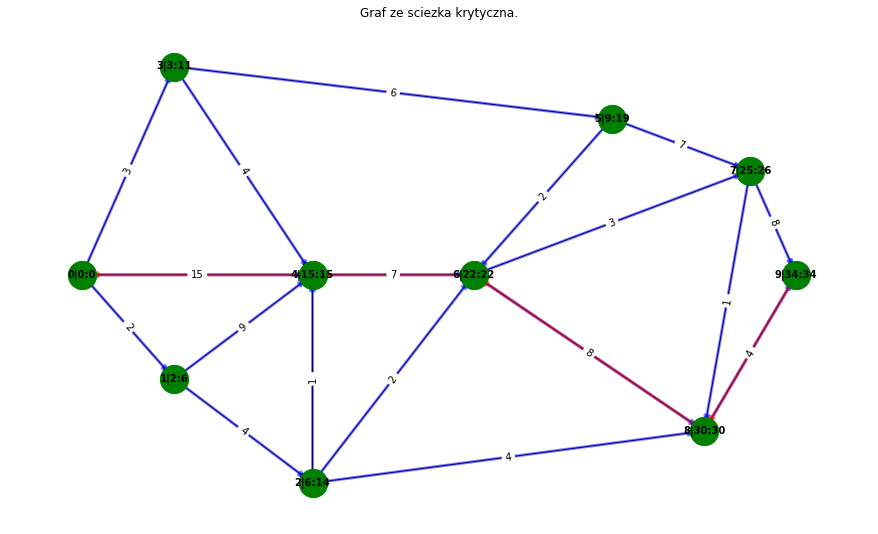

In [115]:
M = nx.to_numpy_array(G, nodelist=[i for i in range(10)])
terminy, old2NewIndexes, edges = findCritical(M)


fig = plt.figure(figsize=(12, 7))

pos = {
    0: (17, 3.5),
    1: (15, 2),
    2: (10, 3.5),
    3: (6.5, 3.5),
    4: (3.5, 2.5),
    5: (6.5, 1.5),
    6: (3.5, 5.5),
    7: (16, 4.5),
    8: (13, 5),
    9: (1.5, 3.5)
}

labels = {oldIndex: f"{newIndex}|{int(terminy[newIndex][0])}:{int(terminy[newIndex][1])}" for (oldIndex, newIndex) in old2NewIndexes.items()}

nx.draw(G, pos=pos, labels=labels, with_labels=True, font_size=10, font_weight=1000)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.5, edge_color='b')
nx.draw_networkx_nodes(G, pos, node_size=800, node_color="g")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=3, alpha=0.5, edge_color='r')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title("Graf ze sciezka krytyczna.")
plt.show()


In [116]:
# Diagram Granta

def grant(edges, terminy):
    Pw = dict()
    Pp = dict()
    Kw = dict()
    Kp = dict()
    
    for edge in edges:
        Pw[(edge[0], edge[1])] = terminy[edge[0]][0]
        Pp[(edge[0], edge[1])] = terminy[edge[1]][1] - edge[2]
        Kw[(edge[0], edge[1])] = terminy[edge[0]][0] + edge[2]
        Kp[(edge[0], edge[1])] = terminy[edge[1]][1]
    return Pw, Pp, Kw, Kp


edges = [(old2NewIndexes[weight[0]], old2NewIndexes[weight[1]], weight[2]) for weight in weights]
Pw, Pp, Kw, Kp = grant(edges, terminy)

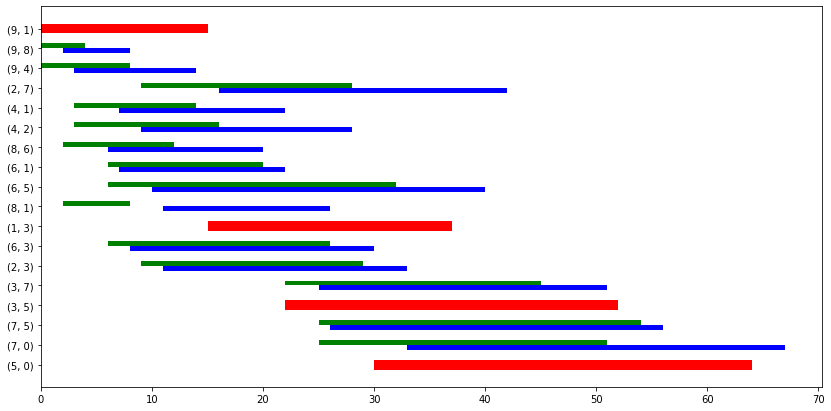

In [117]:

edges_str = [str((old2NewIndexes[key[0]], old2NewIndexes[key[1]])) for key in Pw.keys()]
Pw_list = list(Pw.values())
Pp_list = list(Pp.values())
Kw_list = list(Kw.values())
Kp_list = list(Kp.values())

# Critical
critical_bar_right = [kp if Pw_list[i] == Pp_list[i] else 0 for i, kp in enumerate(Kp_list)]
critical_bar_left = [pw if pw == Pp_list[i] else 0 for i, pw in enumerate(Pw_list)]

# Start
start_bar_right = [pp if Pw_list[i] != Pp_list[i] else 0 for i, pp in enumerate(Pp_list)]
start_bar_left = [pw if pw != Pp_list[i] else 0 for i, pw in enumerate(Pw_list)]

# End
end_bar_right = [kp if Kw_list[i] != kp else 0 for i, kp in enumerate(Kp_list)]
end_bar_left = [kw if kw != Kp_list[i] else 0 for i, kw in enumerate(Kw_list)]


plt.figure(figsize=(14, 7))
plt.barh(edges_str, critical_bar_right, left=critical_bar_left, height=0.5, color='red')
plt.barh(edges_str, start_bar_right, left=start_bar_left, height=0.25, color='green', align='edge')
plt.barh(edges_str, end_bar_right, left=end_bar_left, height=-0.25, color='blue', align='edge')
plt.show()